# Pymaceuticals Inc.
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# Combine the data into a single DataFrame
all_data = pd.merge(study_results, mouse_metadata, 
                       on = 'Mouse ID', 
                       how = 'outer')

# Display the data table for preview
all_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
num_mice = len(pd.unique(all_data['Mouse ID']))
num_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = all_data[all_data.duplicated(subset =['Mouse ID', 'Timepoint'])]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = all_data[all_data['Mouse ID'] == 'g989']
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = all_data[all_data['Mouse ID'] != 'g989']
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame.
cl_num_mice = len(pd.unique(clean_data['Mouse ID']))
cl_num_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, sd, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
median = mean = clean_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
variance = clean_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
stddev = clean_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
stderr = clean_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summ_stats = pd.DataFrame({'Mean Tumor Volume':mean,
                   'Median Tumor Volume':median,
                   'Tumor Volume Variance':variance,
                   'Tumor Volume Std. Dev.':stddev,
                   'Tumor Volume Std. Err.':stderr
                  })
summ_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,41.557809,41.557809,24.947764,4.994774,0.329346
Ceftamin,51.776157,51.776157,39.290177,6.268188,0.469821
Infubinol,51.820584,51.820584,43.128684,6.567243,0.492236
Ketapril,53.698743,53.698743,68.553577,8.279709,0.603860
Naftisol,52.509285,52.509285,66.173479,8.134708,0.596466
Placebo,52.288934,52.288934,61.168083,7.821003,0.581331
Propriva,50.446266,50.446266,43.852013,6.622085,0.544332
Ramicane,40.673236,40.673236,23.486704,4.846308,0.320955
Stelasyn,52.431737,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
sum = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'])
sum

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

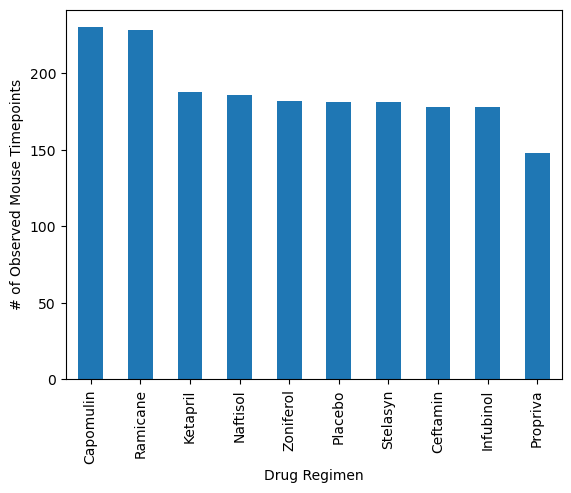

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
## count of timepoints for each drug
tp_drug = clean_data.groupby('Drug Regimen')['Timepoint'].count()
tp_drug = tp_drug.sort_values(ascending = False)

## plot bar chart

pabar = tp_drug.plot(kind = 'bar',
                     xlabel = 'Drug Regimen',
                     ylabel = '# of Observed Mouse Timepoints')


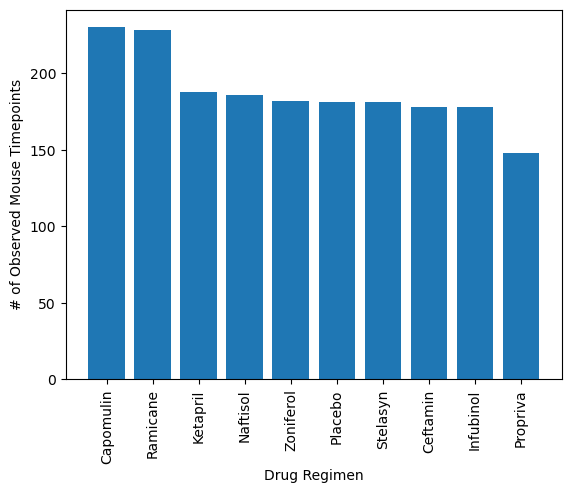

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
## find axis + ticks
x_axis = np.arange(len(tp_drug))

tick_loc = [value for value in x_axis]
tick_labels = tp_drug.index

## plot
plt.bar(x_axis, tp_drug, align = 'center')
plt.xticks(tick_loc, tick_labels, rotation = 'vertical')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

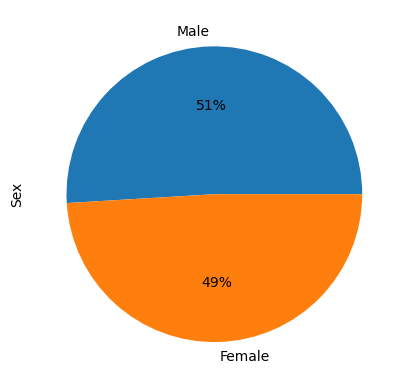

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
## count mice gender
mouse_sex = clean_data.groupby('Sex')['Mouse ID'].count()
mouse_sex = mouse_sex.sort_values(ascending = False)

## plot pie chart
papie = mouse_sex.plot(kind = 'pie',
                      autopct = '%1.0f%%',
                      ylabel = 'Sex')

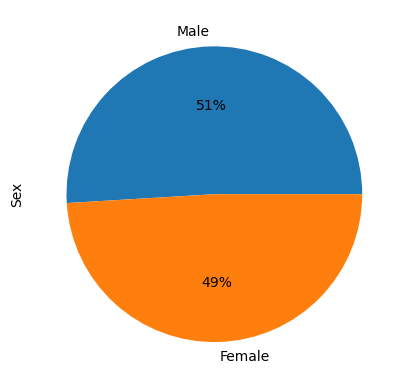

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_values = np.array(mouse_sex)
pie_labels = mouse_sex.index


plt.pie(pie_values, 
        labels = pie_labels, 
        autopct = '%1.0f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
max_tp = clean_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_all = pd.merge(max_tp, clean_data, on = ['Mouse ID', 'Timepoint'], how = 'left')
max_sel = max_all[max_all['Drug Regimen'].isin(drugs)]
max_sel.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [62]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

for drug in drugs:
    tumor_vols = [max_sel['Drug Regimen'], max_sel['Tumor Volume (mm3)']]
    tumor_vol_data.append(tumor_vols)

  
quartiles = tumor_vol_data.quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile - lower_quartile
lower_bound = lower_quartile - 1.5 * iqr
upper_bound = upper_quartile + 1.5 * iqr
outliers = tumor_vols[(tumor_vols < lower_bound) | (tumor_vols > upper_bound)]
    
print(f"{drugs} outliers are {outliers}")


AttributeError: 'list' object has no attribute 'quantile'

<Axes: title={'center': 'Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

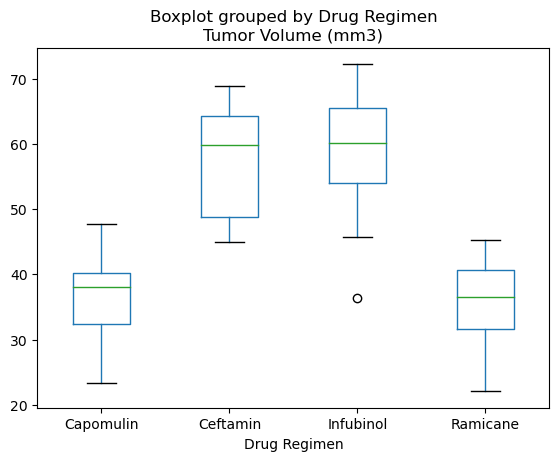

In [63]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
max_sel.boxplot(by = 'Drug Regimen',  column = 'Tumor Volume (mm3)', grid = False)

## Line and Scatter Plots

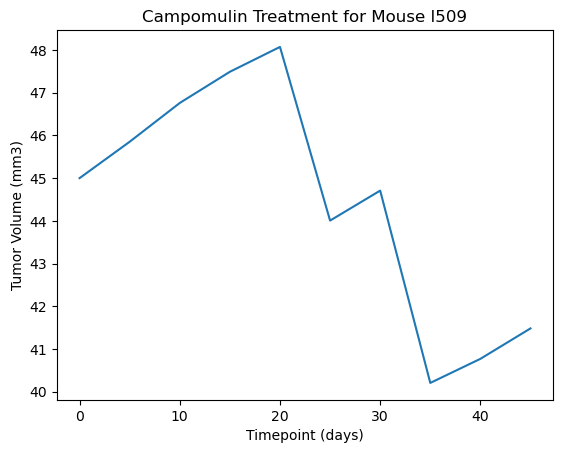

In [64]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
one_cap_mouse = capomulin_data[capomulin_data['Mouse ID'] == 'l509']
plt.plot(one_cap_mouse['Timepoint'], one_cap_mouse['Tumor Volume (mm3)'])
plt.title('Campomulin Treatment for Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

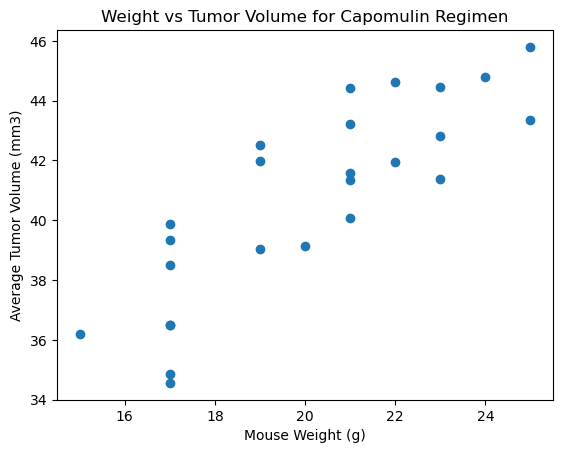

In [65]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
ave_cap_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(mouse_weight, ave_cap_vol)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight vs Tumor Volume for Capomulin Regimen')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


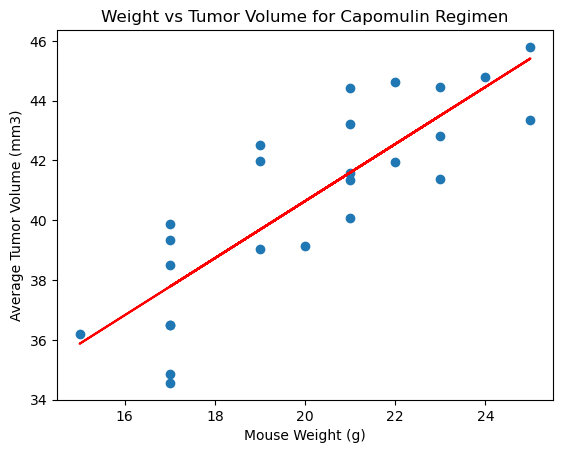

In [66]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_coef = round(st.pearsonr(mouse_weight, ave_cap_vol)[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr_coef}")

from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, ave_cap_vol)
regress_values = mouse_weight * slope + intercept
plt.scatter(mouse_weight, ave_cap_vol)
plt.plot(mouse_weight, regress_values, color = 'red')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight vs Tumor Volume for Capomulin Regimen')
plt.show()